## References

1. Roger A. Horn and Charles R. Johnson, Matrix Analysis (Second Edition), Cambridge University Press, 2013.

# 7 特征值

## Courant–Fischer Minimax Theorem 极小极大定理
记号. 方阵 $A$ 的第$k$**大**的奇异值为$\sigma_k$. 

记号. 若方阵 $A$ 为 Hermite 矩阵, 记第$k$**小**特征值为 $\lambda_k(A)$.

(Courant–Fischer) ([1] p. 236)
$$\lambda_k \ =\  \min_{{\rm rank}(U) = k} \mathop{\max_{x\in {\rm row}(U)\atop \Vert x\Vert_2 = 1}} x^*Ax 
\ =\  \max_{{\rm rank}(U) = n+1-k} \mathop{\min_{x\in {\rm row}(U)\atop \Vert x\Vert_2 = 1}} x^*Ax. $$

### Rayleigh 商

特别地,
$$\lambda_1 = \min \frac{x^*Ax}{x^*x},\quad 
\lambda_n = \max \frac{x^*Ax}{x^*x}$$

### Poincaré Separation Theorem 隔离定理

若 $n\times k\ (n>k)$ 的矩阵 $Q$ 满足 $Q^*Q=I_k$, 则对于 Hermite 矩阵 $A$, ([1] p. 248)
$$\lambda_i(A)\leqslant \lambda_i(Q^*AQ)\leqslant \lambda_{n-k+i}(A).$$ 


证:

$$\lambda_i(Q^*AQ)=\min_{{\rm rank}(U) = i} \mathop{\max_{x\in {\rm row}(U)\atop \Vert x\Vert_2 = 1}} x^*Q^*AQx. $$

注意 $Q^*Q = I$, 故 $Uy \mapsto QUy$ 是双射, 故 ${\rm Row}(U)\longrightarrow {\rm Row}(QU)$ 是双射.

结合 $\Vert Qx\Vert_2^2 = x^*Q^*Qx = x^*x = \Vert x\Vert_2^2$, 若令 $y=Qx$, 则

$$\min_{{\rm rank}(U) = i} \mathop{\max_{x\in {\rm row}(U)\atop \Vert x\Vert_2 = 1}} x^*Q^*AQx 
= \min_{{\rm rank}(U) = i} \mathop{\max_{y\in {\rm row}(QU)\atop \Vert y\Vert_2 = 1}} y^*Ay. $$

注意 ${\rm rank}(U)\geqslant {\rm rank}(QU) \geqslant {\rm rank}(Q^*QU) = {\rm rank}(U)$, 故 
${\rm rank}(QU)={\rm rank}(U)=i$. 因此 
$$\{QU| {\rm rank}(U)=i, U\subset R^n \} \subset \{V| {\rm rank}(V)=i, V\subset R^n \}.$$

因此
$$\lambda_i(Q^*AQ)
= \min_{{\rm rank}(QU) = i} \mathop{\max_{y\in {\rm row}(QU)\atop \Vert y\Vert_2 = 1}} y^*Ay
\geqslant \min_{{\rm rank}(V) = i} \mathop{\max_{y\in {\rm row}(V)\atop \Vert y\Vert_2 = 1}} y^*Ay
= \lambda_i(A).$$

同理
$$\lambda_i(Q^*AQ)\leqslant \lambda_{n-k+i}(A).$$

In [24]:
import numpy as np
n , k = 10 , 8
A = np.random.randn(n,n) 
A = (A + A.T.conj()) / 2.   # to Hermite
Q = np.linalg.qr(np.random.randn(n,k))[0]
B = Q.T @ A @ Q
u , v = np.linalg.eigvalsh(A) , np.linalg.eigvalsh(B)
for i in range(k):
    print('%.6f <= %.6f <= %.6f'%(u[i],v[i],u[i-k]))

-3.926877 <= -3.052868 <= -2.182393
-3.367258 <= -2.835964 <= -0.907139
-2.182393 <= -1.346801 <= -0.580918
-0.907139 <= -0.756822 <= 0.890592
-0.580918 <= 0.881933 <= 2.217261
0.890592 <= 1.581007 <= 2.528416
2.217261 <= 2.809923 <= 2.977110
2.528416 <= 4.368789 <= 4.951946


### Cauchy's Interlacing Theorem 柯西交错定理
(Cauchy) 若 $A$ 是 $n\times n$ 的 Hermite 阵（则特征值都是实数）, 设 $A$ 的前 $(n-1)$ 行与前 $(n-1)$ 列构成 Hermite 阵 $B$, 则 ([1] p. 242)
$$\lambda_1(A)\leqslant \lambda_1(B)\leqslant \lambda_2(A)\leqslant \lambda_2(B) \leqslant \cdots 
\leqslant \lambda_{n-1}(A)\leqslant \lambda_{n-1}(B) \leqslant \lambda_n(A).$$

证:
取 $Q = \left[\begin{matrix} I_{n-1} \\ 0\end{matrix}\right]$, 则 $Q^*Q = I_{n-1}$. 
注意 $B = Q^*AQ$, 运用**Poincaré Separation Theorem**, 得
$$\lambda_i(A)\leqslant \lambda_i(B) \leqslant \lambda_{i+1}(A).$$

In [22]:
import numpy as np
n = 10
A = np.random.randn(n,n) + np.random.randn(n,n)*1j
A = (A + A.T.conj()) / 2. # to Hermite
u , v = np.linalg.eigvalsh(A) , np.linalg.eigvalsh(A[:-1,:-1])

print('%.6f '%(u[0]), end='')
for i in range(n-1):
    print('<= %.6f <= %.6f '%(v[i],u[i+1]) ,end='')

-5.221824 <= -5.137579 <= -3.598130 <= -2.740290 <= -2.480573 <= -2.304974 <= -1.827582 <= -0.854917 <= -0.788340 <= -0.597603 <= -0.204771 <= 0.386571 <= 1.790189 <= 1.796895 <= 2.659210 <= 3.031490 <= 3.193260 <= 3.969319 <= 4.551648 

### Weyl 定理

$A,B$ 为 $n\times n$ 的 Hermite 阵, 则 ([1] p. 239)

$$\lambda_{i-k+1}(A)+\lambda_k(B)\leqslant \lambda_i(A+B)\leqslant \lambda_{i+j}(A)+\lambda_{n-j}(B)$$

### 推论

([1] p. 242)

$$\lambda_{i}(A)+\lambda_1(B)\leqslant \lambda_i(A+B)\leqslant \lambda_{i}(A)+\lambda_{n}(B)$$

若 $B$ 半正定, 则

$$\lambda_{i}(A)\leqslant \lambda_i(A+B)$$

### 推论2

若 $A,B$ 为 Hermite 矩阵, 则其特征值的距离被 $A-B$ 控制:

$$\max_k |\lambda_k(A)-\lambda_k(B)| \leqslant \rho(A-B)  \leqslant \Vert A-B\Vert_2$$

### Hoffman-Wiedlant 不等式

若 $A,B$ 为 Hermite 矩阵, 则其特征值的总距离被 A-B 控制:
$$\sum_{k=1}^n \left(\lambda_k \left(A\right) - \lambda_k \left(B\right)\right)^2 \leqslant \Vert A-B\Vert_F^2$$

### 其它

若 $A$ 为 Hermite 矩阵, 则 $\sum_{i=1}^n |\lambda_i| \geqslant \sum_{i=1}^n |a_{ii}|$.

证: 谱分解,  $A = \sum_{i=1}^n \lambda_i q_iq_i^*$, 其中 $q_i$ 为一组标准正交基. 再记 $e_i = [0,0,\dotsc,1,0,\dotsc,0]^T$ 为单位阵的第 $i$ 列. 则 
$$a_{jj} = e_j^*Ae_j = \sum_{i=1}^n \lambda_i e_j^*q_iq_i^*e_j=\sum_{i=1}^n \lambda_i |q_i^*e_j|^2$$
于是
$$\sum_{j=1}^n |a_{jj}|\leqslant \sum_{j=1}^n \sum_{i=1}^n |\lambda_i| |q_i^*e_j|^2
=\sum_{i=1}^n |\lambda_i| \sum_{j=1}^n |q_i^*e_j|^2
=\sum_{i=1}^n |\lambda_i| \sum_{j=1}^n |q_{ij}|^2=\sum_{i=1}^n |\lambda_i| .
$$

In [36]:
import numpy as np
n = 10
A = np.random.randn(n,n)
B = np.random.randn(n,n)
A = (A + A.T.conj())/2.
B = (B + B.T.conj())/2.
u , v = np.linalg.eigvalsh(A) , np.linalg.eigvalsh(B) 
dist = np.sum(np.square(u - v))
fro  = np.linalg.norm(A - B)
print(dist, fro)

8.25062053835345 9.447292821748807


### Kyfan's Trace Minimization Theorem 樊畿迹极小化定理

已知 $n\times n$ 的 Hermite 阵 $A$, 则对于满足 $Q^*Q = I_k$ 的 $Q\in \mathbb C^{n\times k}$, ([1] p. 248)

$${\rm tr}\left(Q^*AQ\right) \geqslant \lambda_1(A)+\lambda_2(A)+\dotsc + \lambda_k(A)$$
$${\rm tr}\left(Q^*AQ\right) \leqslant \lambda_n(A)+\lambda_{n-1}(A)+\dotsc + \lambda_{n+1-k}(A)\\$$

当 $Q$ 为 $A$ 的最小(最大)的 k 个特征值对应的特征向量构成的矩阵可相应取等.

### 推论

已知 $n\times n$ 的任意方阵 $A$, 设其奇异值为 $\sigma_1\geqslant \sigma_2 \geqslant \dotsc \geqslant \sigma_n$, 则对于满足 $Q^*Q = I_k$ 的 $Q\in \mathbb C^{n\times k}$, 有:

$$\sum_{i=n-k+1}^n \sigma_i^2 (A)\leqslant \Vert AQ\Vert_F^2\leqslant \sum_{i=1}^k \sigma_i^2 (A)$$

且 $Q$ 为 $A$ 相应奇异向量构成的矩阵时可以取等.

### 奇异值的 Courant-Fischer 极小极大定理

记号. $A\in \mathbb C^{m\times n}$,  $m\geqslant n$, 其奇异值降序排列: $\sigma_1(A)\geqslant \dotsc\geqslant \sigma_n(A)\geqslant 0$.

则 
$$\sigma_k(A) = \max_{{\rm rank}(U)=k}\mathop{\min_{x\in {\rm row}(U)\atop \Vert x\Vert_2 = 1}} \Vert Ax\Vert_2
\ =\  \max_{{\rm rank}(U) = n+1-k} \mathop{\min_{x\in {\rm row}(U)\atop \Vert x\Vert_2 = 1}} \Vert Ax\Vert_2. $$

### Rayleigh 商

特别地, 

$$\sigma_1(A) = \max_{\Vert x\Vert_2=1} \Vert Ax\Vert_2,\quad 
\sigma_n(A) = \min_{\Vert x\Vert_2=1}\Vert Ax\Vert_2$$

且,
$$\sigma_1(A) = \max_{\Vert x\Vert_2=\Vert y\Vert_2=1} |y^*Ax|$$

证: 若 $\Vert x\Vert_2=\Vert y\Vert_2=1$, 则 $A^*yy^*A$ 是秩 1 矩阵,
$$x^*A^*yy^*Ax\leqslant \lambda_n(A^*yy^*A)={\rm tr}(A^*yy^*A) = {\rm tr}(y^*AA^*y)\leqslant \sigma_1(A)^2$$

最后一步不等式是 Kyfan 定理的推论. 显然可取等.

### 奇异值的 Weyl 不等式

$$\max_k |\sigma_k(A)-\sigma_k(B)|\leqslant \Vert A-B\Vert_2$$

证: 由 Schur 补的技巧易证 $\sigma_k(A)=\lambda_{m+n+1-k}\left(\left[\begin{matrix}0 & A^T\\A & 0\end{matrix}\right]\right)$, $\sigma_k(B)=\lambda_{m+n+1-k}\left(\left[\begin{matrix}0 & B^T\\B & 0\end{matrix}\right]\right)$
从而
$$\max_k |\sigma_k(A)-\sigma_k(B)|\leqslant \Vert \left[\begin{matrix}0 & (A-B)^T\\(A-B)& 0\end{matrix}\right]\Vert_2
\leqslant \sigma_1(A-B) = \Vert A-B\Vert_2
$$


### 奇异值的 Hoffman-Wielandt 不等式

$$\sum_{k=1}^n \left(\sigma_k(A)-\sigma_k(B)\right)^2\leqslant \Vert A-B\Vert_F^2$$

In [50]:
import numpy as np
n = 4
A = np.random.randn(n,n)
B = np.zeros((n*2,n*2))
B[n:,:n] = A.T
B[:n,n:] = A
print(np.linalg.eigvalsh(B))
print(np.linalg.svd(A)[1])

[-2.22323294 -1.97377794 -0.70409105 -0.07513333  0.07513333  0.70409105
  1.97377794  2.22323294]
[2.22323294 1.97377794 0.70409105 0.07513333]


### Eckart-Young Theorem 最佳低秩逼近

$$\min_{{\rm rank}(B)\leqslant k}\Vert A-B\Vert_2 = \sigma_{k+1}(A)$$
$$\min_{{\rm rank}(B)\leqslant k}\Vert A-B\Vert_F^2 = \sum_{i=k+1}^n \sigma_i(A)^2
$$

取等只需要在 $A$ 的奇异值分解中滤去最小的若干奇异值即可. 

## Gerschgorin 定理

方阵 $A$ 所有特征值位于 $n$ 个盖尔圆盘的并集中 ([1] p. 388):

$$\lambda(A)\in \bigcup_{i=1}^n \{|z-a_{ii}| \leqslant \sum_{j\neq i}|a_{ij}|\}$$

更强地, 若并集中某一连通区域恰有 $m$ 个圆盘, 则应恰有 $m$ 个特征值落在该连通区域, 称为 Gerschgorin 第二圆盘定理.

注: 考虑转置, 上述定理每个圆盘的半径全改为对列求和同样成立:

$$\lambda(A)\in \bigcup_{i=1}^n \{|z-a_{ii}| \leqslant \sum_{j\neq i}|a_{ji}|\}$$

证: (只证明较弱的第一圆盘定理) 任取 $A$ 的特征值 $\lambda$ 与对应特征向量 $x$, 设 $|x_r| = \max_{1\leqslant j\leqslant r}|x_j|$ 为模长最大的分量, 则

$$\lambda x_{r} = a_{rj} x_r + \sum_{j\neq r} a_{rj}x_{j}\quad\Rightarrow\quad |\lambda-a_{rj}|\leqslant \sum_{j\neq r}|a_{rj}|.$$

<br>


### (复) 对称矩阵的 Gerschgorin 定理

若 $A\in \mathbb C^{n\times n}$ 是 Hermite 矩阵, 则如下每个圆盘至少含有 1 个特征值:

$$D_i = \{|z-a_{ii}|^2\leqslant \sum_{j\neq i}|a_{ij}|^2\}$$

证: 对于任意 $r$, 作方阵 $B= [b_{ij}]$, 其中 $b_{ij} = \left\{\begin{array}{ll}a_{ij}& i\neq r,j\neq r,\\ a_{rr} & i=j=r,\\ 0 & {\rm else}.\end{array}\right.$ 通过行列交换并分块显然 $b_{rr}=a_{rr}$ 是 $B$ 的一个特征值.

根据 Weyl 定理的推论, $A,B$ 对应序数的特征值之差被控制: $\lambda_k(A) - \lambda_k(B)\leqslant \rho( A-B)$. 因此只需证明 $\rho(A-B)\leqslant \sqrt{\sum_{j\neq i}|a_{ij}|^2}$.

令 $v = [a_{1r},\dotsc,a_{r-1,r},a_{r+1,r}\dotsc,a_{nr}]^T$, 则 $(A-B)$ 的特征值即为 $\left[\begin{matrix}0 & v^*\\ v & 0\end{matrix}\right]$ 的特征值. 对于 $\forall \tilde x\in\mathbb C^n$, 分块为 $\tilde x = [x_1,x]$ 其中 $x_1\in\mathbb C$, $ x\in\mathbb C^{n-1}$, 则 

$$\rho(A-B)= \sup_{\Vert \tilde x\Vert\leqslant 1} \tilde x^*(A-B)\tilde x =\sup_{\Vert \tilde x\Vert\leqslant 1}( \bar x_1v^*x + x^*v x_1)
\leqslant  \sup_{\Vert \tilde x\Vert\leqslant 1}2\Vert v\Vert|x_1|\Vert  x\Vert$$

注意 $|x_1|^2+\Vert x\Vert^2 = \Vert \tilde x\Vert^2\leqslant 1$, 故 $|x_1|\Vert  x\Vert\leqslant \frac12$, 因此 $\rho(A-B)\leqslant \Vert v\Vert = \sqrt{\sum_{j\neq i}|a_{ij}|^2}$. 证毕. (注: 实际上 $\rho(A-B)=\Vert v\Vert$)


### Ostrowski 定理

可以将行盖尔圆盘与列盖尔圆盘的半径进行几何平均: 记 $R_i,C_i$ 为如下

$$R_i = \sum_{j\neq i}|a_{ij}|\quad{\rm and}\quad C_i = \sum_{j\neq i}|a_{ji}|$$


则任意 $\alpha \in [0,1]$, 方阵 $A$ 所有特征值位于如下 $n$ 个圆盘的并集中 ([1] p. 413):

$$\lambda(A)\in \bigcup_{i=1}^n  \{|z-a_{ii}| \leqslant R_i^\alpha C_i^{1-\alpha} \}$$


### Brauer 定理

方阵 $A$ 所有特征值位于如下的 $\frac{n(n-1)}{2}$ 个卡西尼卵形中 ([1] p. 415):

$$\lambda(A)\in \bigcup_{i\neq j} \left\{|z-a_{ii}||z-a_{jj}| \leqslant R_iR_j\right\}$$

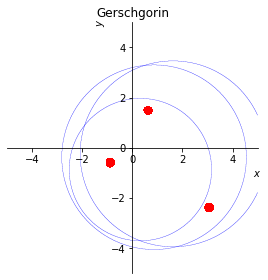

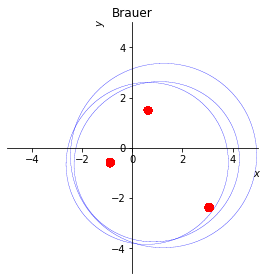

In [50]:
import numpy as np
import sympy as sp

def Eigenplot(A, xrange, yrange, method = 'Gerschgorin'):
    assert method in ['Gerschgorin', 'Brauer'], 'Method should be one of "Gerschgorin" or "Brauer".'
    rowsum = np.abs(A).sum(axis = 1) - np.abs(A.flat[::A.shape[0]+1])
    x, y = sp.symbols('x y')
    if method == 'Gerschgorin':
        plots = [sp.plot_implicit(
                        (x-A[i,i].real)**2 + (y-A[i,i].imag)**2 - rowsum[i]**2,
                        (x,xrange[0], xrange[1]), (y, yrange[0], yrange[1]), 
                        show = False, aspect_ratio = (1,1), title = 'Gerschgorin'
                    ) for i in range(A.shape[0])
                ]
    elif method == 'Brauer':
        from itertools import combinations
        plots = [sp.plot_implicit(
                        ((x-A[i,i].real)**2 + (y-A[i,i].imag)**2) * ((x-A[j,j].real)**2 + (y-A[j,j].imag)**2)\
                            - rowsum[i]**2 * rowsum[j]**2,
                        (x,xrange[0], xrange[1]), (y, yrange[0], yrange[1]), 
                        show = False, aspect_ratio = (1,1), title = 'Brauer'
                    ) for i, j in combinations(range(A.shape[0]), 2)
                ]
    eigvals = [sp.plot_implicit(
                    (x-eig.real)**2 + (y-eig.imag)**2 < (xrange[1] - xrange[0])/240, 
                    (x,xrange[0], xrange[1]), (y, yrange[0], yrange[1]), 
                    show = False, aspect_ratio = (1,1), line_color = 'red'
                ) for eig in (np.linalg.eigvals(A))
            ]
    [plots[0].extend(_) for _ in plots[1:]]
    [plots[0].extend(_) for _ in eigvals]
    return plots[0]


np.random.seed(1)
A = np.random.randn(3,3) + np.random.randn(3,3) * 1j

Eigenplot(A, (-5, 5), (-5, 5), method = 'Gerschgorin').show()
Eigenplot(A, (-5, 5), (-5, 5), method = 'Brauer').show()

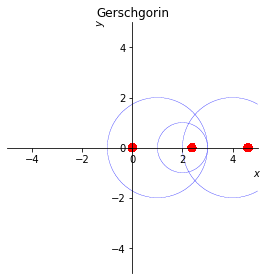

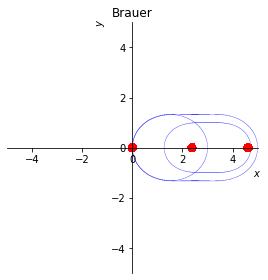

In [49]:
A = np.array([[1,1,1],[2,4,0],[1,0,2]])
Eigenplot(A, (-5, 5), (-5, 5), method = 'Gerschgorin').show()
Eigenplot(A, (-5, 5), (-5, 5), method = 'Brauer').show()